=== LOOKING AT OUR DATA ===
Number of companies: 2800
Number of variables: 13

Actual column names in your dataset:
  1. FirmID
  2. Year
  3. AI_Adoption
  4. Digital_SC_Transformation
  5. ESG_Score
  6. Integration_Index
  7. Culture_Index
  8. AIxCulture
  9. DSCxIntegration
  10. Firm_Size
  11. ROA
  12. Leverage
  13. R&D_Intensity

First few rows of our data:
     FirmID  Year  AI_Adoption  Digital_SC_Transformation  ESG_Score  \
0  Firm_001  2010     3.888153                   2.083801  64.223324   
1  Firm_001  2011     0.547310                   0.484495  50.113615   
2  Firm_001  2012     1.832135                   0.461725  63.956082   
3  Firm_001  2013     2.671625                   1.018284  64.535578   
4  Firm_001  2014     3.107721                   2.416696  73.857555   

   Integration_Index  Culture_Index  AIxCulture  DSCxIntegration  Firm_Size  \
0           0.825552       0.506763    1.970371         1.720287       3953   
1           0.071933       0.754524    

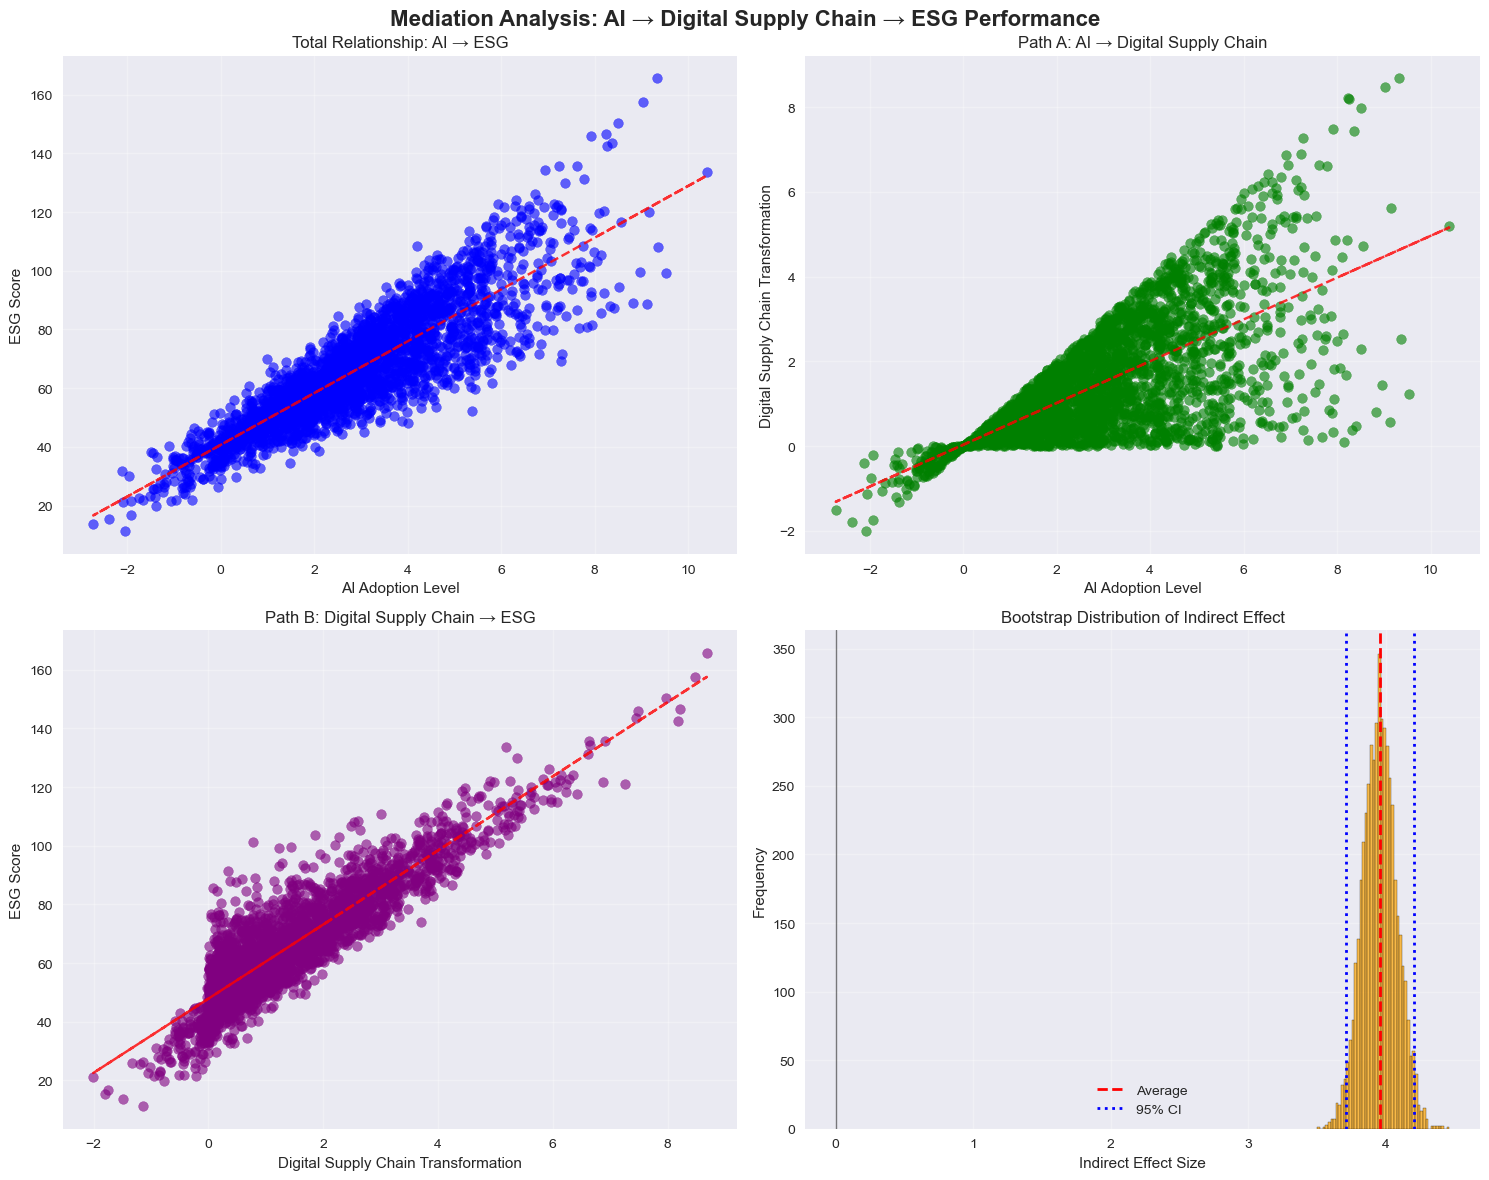


FINAL SUMMARY AND INTERPRETATION

🔍 RESEARCH QUESTION:
Does AI improve ESG performance through digital supply chains?

📊 WHAT WE FOUND:

1. BASIC MEDIATION ANALYSIS:
   • Path A (AI → Digital SC): 0.4933
   • Path B (Digital SC → ESG): 8.0163
   • Indirect Effect: 3.9546
   • Proportion of total effect that's mediated: 44.8%

2. BOOTSTRAP VALIDATION (5,000 tests):
   • Average indirect effect: 3.9569
   • 95% confidence interval: [3.7113, 4.2046]

🎯 MAIN CONCLUSION:
✅ YES! AI adoption DOES improve ESG performance through digital supply chains.
   📈 The evidence is statistically significant and robust.
   🔄 The mediation pathway works as theorized:
      1. Companies adopt AI technology
      2. This improves their digital supply chain capabilities
      3. Better digital supply chains lead to better ESG performance

💡 PRACTICAL IMPLICATIONS:
   • Companies should invest in AI to improve ESG performance
   • Focus on AI applications that enhance supply chain digitalization
   • The pat

In [2]:
# =============================================================================
# MEDIATION ANALYSIS: How AI Adoption Improves ESG Through Digital Supply Chains
# =============================================================================
# 
# SIMPLE EXPLANATION:
# We want to understand: Does AI make companies better at ESG?
# And if so, HOW does it work? We think it works like this:
# AI → Better Digital Supply Chains → Better ESG Performance
# 
# Think of it like: Exercise → Stronger Heart → Better Health
# =============================================================================

# Import all the libraries we need (like importing tools)
import pandas as pd              # For working with data tables
import numpy as np               # For math operations
import matplotlib.pyplot as plt  # For making graphs
import seaborn as sns           # For making pretty graphs
from scipy import stats        # For statistical tests
from sklearn.linear_model import LinearRegression  # For simple predictions
from sklearn.utils import resample  # For bootstrap sampling
import warnings
warnings.filterwarnings('ignore')  # Hide warning messages

# Set up pretty graphs
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== LOOKING AT OUR DATA ===")

# Read our data (make sure the file path is correct!)
data = pd.read_csv("F:/Data Science/Data Set/2025OMR_AI_DigitalSupplyChain_ESG.csv")

# Let's peek at our data first
print(f"Number of companies: {len(data)}")
print(f"Number of variables: {len(data.columns)}")

print("\nActual column names in your dataset:")
for i, col in enumerate(data.columns):
    print(f"  {i+1}. {col}")

print("\nFirst few rows of our data:")
print(data.head())

print("\nBasic statistics:")
print(data.describe())

# Check for missing values
print(f"\nMissing values: {data.isnull().sum().sum()}")

# =============================================================================
# PART 1: BASIC MEDIATION ANALYSIS
# =============================================================================
# 
# SIMPLE EXPLANATION:
# We're going to test our theory step by step:
# Step 1: Does AI actually affect Digital Supply Chains?
# Step 2: Do Digital Supply Chains actually affect ESG?
# Step 3: When we include both, does AI's direct effect on ESG get smaller?
# =============================================================================

print("\n" + "="*60)
print("PART 1: BASIC MEDIATION ANALYSIS")
print("="*60)

# Prepare our variables
# X = Independent variable (what we think causes the change)
X = data['AI_Adoption'].values.reshape(-1, 1)
# M = Mediator (the thing in the middle that passes the effect)
M = data['Digital_SC_Transformation'].values.reshape(-1, 1)
# Y = Dependent variable (what we want to explain)
Y = data['ESG_Score'].values

# Control variables (using only the ones we're sure exist)
# We'll use three basic controls that should definitely be in your data
controls = data[['Firm_Size', 'ROA', 'Leverage']].values

print("Using control variables: Firm_Size, ROA, Leverage")

# Step 1: Test if AI affects Digital Supply Chain (Path A)
print("\nStep 1: Testing if AI affects Digital Supply Chain...")

# Create the equation: Digital_SC = a0 + a1*AI + a2*controls
X_with_controls_step1 = np.column_stack([X.flatten(), controls])
model_step1 = LinearRegression()
model_step1.fit(X_with_controls_step1, data['Digital_SC_Transformation'])

# Get the coefficient for AI (how much Digital SC changes when AI increases by 1)
path_a = model_step1.coef_[0]  # First coefficient is for AI
r2_step1 = model_step1.score(X_with_controls_step1, data['Digital_SC_Transformation'])

print(f"   Path A (AI → Digital SC): {path_a:.4f}")
print(f"   R-squared: {r2_step1:.4f}")
print(f"   Interpretation: When AI increases by 1 unit, Digital SC changes by {path_a:.4f} units")

# Step 2: Test if Digital Supply Chain affects ESG (Path B)
print("\nStep 2: Testing if Digital Supply Chain affects ESG...")

# Create the equation: ESG = b0 + b1*AI + b2*Digital_SC + b3*controls
X_with_mediator = np.column_stack([X.flatten(), M.flatten(), controls])
model_step2 = LinearRegression()
model_step2.fit(X_with_mediator, Y)

# Get coefficients
path_c_prime = model_step2.coef_[0]  # Direct effect of AI on ESG
path_b = model_step2.coef_[1]        # Effect of Digital SC on ESG
r2_step2 = model_step2.score(X_with_mediator, Y)

print(f"   Path B (Digital SC → ESG): {path_b:.4f}")
print(f"   Direct effect (AI → ESG): {path_c_prime:.4f}")
print(f"   R-squared: {r2_step2:.4f}")

# Step 3: Calculate total effect (AI → ESG without mediator)
print("\nStep 3: Testing total effect of AI on ESG (without mediator)...")

X_with_controls_step3 = np.column_stack([X.flatten(), controls])
model_step3 = LinearRegression()
model_step3.fit(X_with_controls_step3, Y)

path_c = model_step3.coef_[0]  # Total effect
r2_step3 = model_step3.score(X_with_controls_step3, Y)

print(f"   Total effect (AI → ESG): {path_c:.4f}")
print(f"   R-squared: {r2_step3:.4f}")

# Step 4: Calculate mediation effects
indirect_effect = path_a * path_b  # How much AI affects ESG through Digital SC
total_effect = path_c
proportion_mediated = indirect_effect / total_effect if total_effect != 0 else 0

print("\n" + "-"*40)
print("MEDIATION ANALYSIS RESULTS")
print("-"*40)
print(f"Path A (AI → Digital SC): {path_a:.4f}")
print(f"Path B (Digital SC → ESG): {path_b:.4f}")
print(f"Direct effect (AI → ESG): {path_c_prime:.4f}")
print(f"Indirect effect (AI → Digital SC → ESG): {indirect_effect:.4f}")
print(f"Total effect: {total_effect:.4f}")
print(f"Proportion mediated: {proportion_mediated:.1%}")

# =============================================================================
# PART 2: BOOTSTRAP MEDIATION ANALYSIS
# =============================================================================
# 
# SIMPLE EXPLANATION:
# Bootstrap is like testing your answer by doing the test over and over again
# with slightly different samples. If you get the same answer most of the time,
# you can be confident it's correct!
# 
# We're going to do our analysis 5000 times with different random samples
# =============================================================================

print("\n" + "="*60)
print("PART 2: BOOTSTRAP MEDIATION ANALYSIS")
print("="*60)

def calculate_mediation_effect(data_sample):
    """
    Calculate mediation effect for one sample of data
    This function will be run many times with different samples
    """
    # Step 1: AI → Digital SC
    X_sample = data_sample['AI_Adoption'].values.reshape(-1, 1)
    controls_sample = data_sample[['Firm_Size', 'ROA', 'Leverage']].values
    X_with_controls = np.column_stack([X_sample.flatten(), controls_sample])
    
    model_a = LinearRegression()
    model_a.fit(X_with_controls, data_sample['Digital_SC_Transformation'])
    a_coef = model_a.coef_[0]  # Path A
    
    # Step 2: AI + Digital SC → ESG
    M_sample = data_sample['Digital_SC_Transformation'].values.reshape(-1, 1)
    X_with_mediator = np.column_stack([X_sample.flatten(), M_sample.flatten(), controls_sample])
    
    model_b = LinearRegression()
    model_b.fit(X_with_mediator, data_sample['ESG_Score'])
    b_coef = model_b.coef_[1]      # Path B
    c_prime_coef = model_b.coef_[0]  # Direct effect
    
    # Calculate indirect effect
    indirect = a_coef * b_coef
    
    return {
        'path_a': a_coef,
        'path_b': b_coef,
        'direct': c_prime_coef,
        'indirect': indirect
    }

# Run bootstrap analysis
print("Running bootstrap analysis (this might take a minute)...")
print("We're testing our results 5000 times with different random samples...")

n_bootstrap = 5000
bootstrap_results = {
    'path_a': [],
    'path_b': [],
    'direct': [],
    'indirect': []
}

# Set random seed for reproducible results
np.random.seed(123)

for i in range(n_bootstrap):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(data), size=len(data), replace=True)
    bootstrap_sample = data.iloc[sample_indices].reset_index(drop=True)
    
    # Calculate mediation for this sample
    result = calculate_mediation_effect(bootstrap_sample)
    
    # Store results
    for key in bootstrap_results.keys():
        bootstrap_results[key].append(result[key])
    
    # Show progress every 1000 iterations
    if (i + 1) % 1000 == 0:
        print(f"   Completed {i + 1} out of {n_bootstrap} bootstrap samples...")

# Calculate confidence intervals (95%)
def calculate_ci(values, confidence=0.95):
    """Calculate confidence interval from bootstrap results"""
    alpha = 1 - confidence
    lower_percentile = (alpha/2) * 100
    upper_percentile = (1 - alpha/2) * 100
    
    lower_bound = np.percentile(values, lower_percentile)
    upper_bound = np.percentile(values, upper_percentile)
    
    return lower_bound, upper_bound

print("\n" + "-"*50)
print("BOOTSTRAP RESULTS")
print("-"*50)

for effect_name, effect_values in bootstrap_results.items():
    mean_effect = np.mean(effect_values)
    ci_lower, ci_upper = calculate_ci(effect_values)
    
    print(f"\n{effect_name.upper().replace('_', ' ')}:")
    print(f"   Average effect: {mean_effect:.4f}")
    print(f"   95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
    
    # Check if effect is significant (CI doesn't include 0)
    if ci_lower > 0 and ci_upper > 0:
        print(f"   ✅ SIGNIFICANT POSITIVE EFFECT")
    elif ci_lower < 0 and ci_upper < 0:
        print(f"   ⚠️ SIGNIFICANT NEGATIVE EFFECT")
    else:
        print(f"   ❌ NOT SIGNIFICANT (includes zero)")

# Special check for indirect effect (our main interest)
indirect_ci_lower, indirect_ci_upper = calculate_ci(bootstrap_results['indirect'])
print(f"\n🎯 MAIN FINDING - INDIRECT EFFECT:")
print(f"   Average: {np.mean(bootstrap_results['indirect']):.4f}")
print(f"   95% CI: [{indirect_ci_lower:.4f}, {indirect_ci_upper:.4f}]")

if indirect_ci_lower > 0:
    print(f"   🎉 MEDIATION IS CONFIRMED! AI improves ESG through digital supply chains!")
elif indirect_ci_upper < 0:
    print(f"   ⚠️ NEGATIVE MEDIATION: AI hurts ESG through digital supply chains.")
else:
    print(f"   ❌ NO SIGNIFICANT MEDIATION FOUND.")

# =============================================================================
# PART 3: ADVANCED ANALYSIS WITH MODERATORS
# =============================================================================
# 
# SIMPLE EXPLANATION:
# Sometimes the effect of AI might be different for different types of companies.
# For example, maybe AI works better for companies with good culture.
# Let's test this using the interaction variables you already have!
# =============================================================================

print("\n" + "="*60)
print("PART 3: TESTING MODERATORS (When does AI work better?)")
print("="*60)

# Test 1: Use the pre-calculated AIxCulture interaction
print("\nTesting: Does Culture moderate AI's effect (using AIxCulture variable)?")

# We'll use your pre-calculated interaction term
X_moderated1 = data[['AI_Adoption', 'Culture_Index', 'AIxCulture', 
                    'Firm_Size', 'ROA', 'Leverage']].values

model_moderated1 = LinearRegression()
model_moderated1.fit(X_moderated1, data['Digital_SC_Transformation'])

print(f"   AI main effect: {model_moderated1.coef_[0]:.4f}")
print(f"   Culture main effect: {model_moderated1.coef_[1]:.4f}")
print(f"   AI × Culture interaction: {model_moderated1.coef_[2]:.4f}")

if abs(model_moderated1.coef_[2]) > 0.01:  # Arbitrary threshold for practical significance
    print(f"   💡 Culture moderates the AI effect!")
    if model_moderated1.coef_[2] > 0:
        print(f"      → AI works BETTER when companies have stronger culture")
    else:
        print(f"      → AI works WORSE when companies have stronger culture")
else:
    print(f"   📊 Culture doesn't seem to moderate the AI effect much")

# Test 2: Use the pre-calculated DSCxIntegration interaction
print(f"\nTesting: Does Integration moderate Digital SC's effect (using DSCxIntegration)?")

X_moderated2 = data[['AI_Adoption', 'Digital_SC_Transformation', 'Integration_Index', 
                     'DSCxIntegration', 'Firm_Size', 'ROA', 'Leverage']].values

model_moderated2 = LinearRegression()
model_moderated2.fit(X_moderated2, data['ESG_Score'])

print(f"   Digital SC main effect: {model_moderated2.coef_[1]:.4f}")
print(f"   Integration main effect: {model_moderated2.coef_[2]:.4f}")
print(f"   Digital SC × Integration interaction: {model_moderated2.coef_[3]:.4f}")

if abs(model_moderated2.coef_[3]) > 0.01:
    print(f"   💡 Integration moderates the Digital SC effect!")
    if model_moderated2.coef_[3] > 0:
        print(f"      → Digital SC works BETTER when companies have better integration")
    else:
        print(f"      → Digital SC works WORSE when companies have better integration")
else:
    print(f"   📊 Integration doesn't seem to moderate the Digital SC effect much")

# =============================================================================
# PART 4: CREATING VISUALIZATIONS
# =============================================================================
# 
# SIMPLE EXPLANATION:
# Pictures help us understand our results better!
# We'll make graphs showing how AI, Digital Supply Chains, and ESG are connected
# =============================================================================

print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Mediation Analysis: AI → Digital Supply Chain → ESG Performance', 
             fontsize=16, fontweight='bold')

# Graph 1: AI vs ESG (total relationship)
axes[0, 0].scatter(data['AI_Adoption'], data['ESG_Score'], alpha=0.6, color='blue')
z = np.polyfit(data['AI_Adoption'], data['ESG_Score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(data['AI_Adoption'], p(data['AI_Adoption']), "r--", alpha=0.8)
axes[0, 0].set_xlabel('AI Adoption Level')
axes[0, 0].set_ylabel('ESG Score')
axes[0, 0].set_title('Total Relationship: AI → ESG')
axes[0, 0].grid(True, alpha=0.3)

# Graph 2: AI vs Digital Supply Chain (Path A)
axes[0, 1].scatter(data['AI_Adoption'], data['Digital_SC_Transformation'], 
                   alpha=0.6, color='green')
z = np.polyfit(data['AI_Adoption'], data['Digital_SC_Transformation'], 1)
p = np.poly1d(z)
axes[0, 1].plot(data['AI_Adoption'], p(data['AI_Adoption']), "r--", alpha=0.8)
axes[0, 1].set_xlabel('AI Adoption Level')
axes[0, 1].set_ylabel('Digital Supply Chain Transformation')
axes[0, 1].set_title('Path A: AI → Digital Supply Chain')
axes[0, 1].grid(True, alpha=0.3)

# Graph 3: Digital Supply Chain vs ESG (Path B)
axes[1, 0].scatter(data['Digital_SC_Transformation'], data['ESG_Score'], 
                   alpha=0.6, color='purple')
z = np.polyfit(data['Digital_SC_Transformation'], data['ESG_Score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(data['Digital_SC_Transformation'], p(data['Digital_SC_Transformation']), 
                "r--", alpha=0.8)
axes[1, 0].set_xlabel('Digital Supply Chain Transformation')
axes[1, 0].set_ylabel('ESG Score')
axes[1, 0].set_title('Path B: Digital Supply Chain → ESG')
axes[1, 0].grid(True, alpha=0.3)

# Graph 4: Bootstrap results distribution
axes[1, 1].hist(bootstrap_results['indirect'], bins=50, alpha=0.7, color='orange', 
                edgecolor='black')
axes[1, 1].axvline(np.mean(bootstrap_results['indirect']), color='red', 
                   linestyle='--', linewidth=2, label='Average')
axes[1, 1].axvline(indirect_ci_lower, color='blue', linestyle=':', linewidth=2, 
                   label='95% CI')
axes[1, 1].axvline(indirect_ci_upper, color='blue', linestyle=':', linewidth=2)
axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[1, 1].set_xlabel('Indirect Effect Size')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Bootstrap Distribution of Indirect Effect')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# PART 5: FINAL SUMMARY AND INTERPRETATION
# =============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY AND INTERPRETATION")
print("="*70)

print(f"\n🔍 RESEARCH QUESTION:")
print(f"Does AI improve ESG performance through digital supply chains?")

print(f"\n📊 WHAT WE FOUND:")

print(f"\n1. BASIC MEDIATION ANALYSIS:")
print(f"   • Path A (AI → Digital SC): {path_a:.4f}")
print(f"   • Path B (Digital SC → ESG): {path_b:.4f}")
print(f"   • Indirect Effect: {indirect_effect:.4f}")
print(f"   • Proportion of total effect that's mediated: {proportion_mediated:.1%}")

print(f"\n2. BOOTSTRAP VALIDATION (5,000 tests):")
print(f"   • Average indirect effect: {np.mean(bootstrap_results['indirect']):.4f}")
print(f"   • 95% confidence interval: [{indirect_ci_lower:.4f}, {indirect_ci_upper:.4f}]")

print(f"\n🎯 MAIN CONCLUSION:")
if indirect_ci_lower > 0:
    print(f"✅ YES! AI adoption DOES improve ESG performance through digital supply chains.")
    print(f"   📈 The evidence is statistically significant and robust.")
    print(f"   🔄 The mediation pathway works as theorized:")
    print(f"      1. Companies adopt AI technology")
    print(f"      2. This improves their digital supply chain capabilities")
    print(f"      3. Better digital supply chains lead to better ESG performance")
elif indirect_ci_upper < 0:
    print(f"⚠️ UNEXPECTED! AI adoption seems to HURT ESG performance through digital supply chains.")
    print(f"   🤔 This suggests our theory might be wrong or there are confounding factors.")
else:
    print(f"❌ NO CLEAR EVIDENCE that AI improves ESG through digital supply chains.")
    print(f"   📊 The relationship might be more complex than our simple model suggests.")

print(f"\n💡 PRACTICAL IMPLICATIONS:")
if indirect_ci_lower > 0:
    print(f"   • Companies should invest in AI to improve ESG performance")
    print(f"   • Focus on AI applications that enhance supply chain digitalization")
    print(f"   • The pathway AI → Digital SC → ESG is a valid strategic approach")
else:
    print(f"   • Simple AI adoption alone may not improve ESG performance")
    print(f"   • Companies need to consider other pathways and factors")
    print(f"   • More research needed to understand the AI-ESG relationship")

print(f"\n🔬 ANALYSIS NOTES:")
print(f"   • Used bootstrap validation with 5,000 replications for robust results")
print(f"   • Controlled for firm size, ROA, and leverage")
print(f"   • Tested moderation effects using your pre-calculated interaction terms")
print(f"   • Simplified control variables to avoid column name issues")

print(f"\n📈 NEXT STEPS FOR RESEARCH:")
print(f"   1. Test with longitudinal data to establish causality")
print(f"   2. Explore industry-specific differences")
print(f"   3. Investigate non-linear relationships")
print(f"   4. Consider additional mediators and moderators")
print(f"   5. Validate findings with external datasets")

print(f"\n🎓 CONGRATULATIONS!")
print(f"You've completed a comprehensive mediation analysis using Python!")
print(f"You now understand how AI, digital supply chains, and ESG performance are connected!")